# Project : The readmission of diabetic patients

**Part 1:**

This code begins by importing necessary libraries for data analysis and machine learning. It then loads a dataset ('diabetic_data.csv'), prints basic information about the dataset, displays the first five rows, and provides an overview of column data types. The code identifies and removes columns with overwhelmingly dominant values.

It addresses issues related to duplicate entries, replacing missing values, and handling specific columns like 'gender'. The data cleaning process involves removing unnecessary columns, handling missing values, and transforming the 'readmitted' column into a binary variable. It also replaces age intervals with corresponding numeric values.

The final DataFrame is prepared for further analysis, containing relevant features and a modified target variable. It addresses issues such as missing data, duplicate entries, and ensures the dataset is suitable for subsequent machine learning tasks.

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

import sklearn.metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset and print Row and colums
df= pd.read_csv('diabetic_data.csv', delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 101766 rows and 50 columns


In [6]:
#displaying first 5 rows of data
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# dowload all the informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
# define the type of the variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [11]:
for i in df.columns:
    if np.array(df[i].value_counts())[0]>101750:
        print(df[i].value_counts())

No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No    101766
Name: examide, dtype: int64
No    101766
Name: citoglipton, dtype: int64
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [9]:
#cleaning the data to no longer have a duplicate
print('Total data = ', len(df))
print('Unique entries = ', len(np.unique(df['patient_nbr'])))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df))

Total data =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


In [10]:
#delete the duplicate variable in the dataset
df.drop(['glimepiride-pioglitazone','metformin-pioglitazone','patient_nbr','encounter_id','acetohexamide','troglitazone','examide','citoglipton'],axis=1,inplace=True)

In [11]:
#this code replaces all occurrences of the string '?' by NaN values in your DataFrame, which is often used to deal with missing values in data.
df.replace('?',np.nan,inplace=True)

In [12]:
#In summary, this code helps identify columns in a DataFrame that contain at least one missing value 
#and displays the percentage of missing values for each of these columns.
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,df[i].isna().sum()*100/len(df))

race 2.7237898151514304
weight 96.0107944853044
payer_code 43.4058558684527
medical_specialty 48.20744427976174
diag_1 0.01538074330937666
diag_2 0.41108532117788527
diag_3 1.7128555049078553


In [13]:
# we will delete data when the percentage of missing data is too high
df.drop(['payer_code','medical_specialty','weight'],axis=1,inplace=True)

In [14]:
#This code removes all rows in the DataFrame df that contain at least one missing value (NaN) 
#and modifies the original DataFrame accordingly.
df.dropna(inplace=True)

In [15]:
#This line of code counts the number of missing values in the 'race' column of the DataFrame df.
#The number being equal to 0 this variable is interesting
df['race'].isna().sum()

0

In [16]:
#This line of code modifies the DataFrame df keeping only the rows where the value in the 'gender' column is not equal to 'Unknown/Invalid'.
df=df[df.gender!='Unknown/Invalid']

In [17]:
# number of women and men in readmission
df['gender'].value_counts()

Female    36440
Male      31917
Name: gender, dtype: int64

In [18]:
#number of people readmitted more than 30 and less than 30
df.readmitted.value_counts()

NO     40728
>30    21539
<30     6090
Name: readmitted, dtype: int64

In [19]:
#This line of code converts the values of the 'readmitted' column in the DataFrame df. 
#If a value is equal to '<30', it is replaced by 1; otherwise, it is replaced by 0.
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

In [20]:
#this code replaces the age intervals in the 'age' column of the DataFrame df 
#with specific numeric values defined in the replaceDict dictionary
replaceDict = { '[0-10)' : 5,
                '[10-20)' : 15, 
                '[20-30)' : 25, 
                '[30-40)' : 35, 
                '[40-50)' : 45, 
                '[50-60)' : 55,
                '[60-70)' : 65, 
                '[70-80)' : 75,
                '[80-90)' : 85,
                '[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])

In [21]:
#gives the ages of all patients
df['age']

1         15
2         25
3         35
4         45
5         55
          ..
101754    75
101755    45
101756    65
101758    85
101765    75
Name: age, Length: 68357, dtype: int64

This part of this code begins by creating a copy of the original DataFrame, 'data'. Subsequently, it modifies specific columns such as 'discharge_disposition_id', 'admission_type_id', 'admission_source_id', and various medication columns based on predefined conditions. It also categorizes values in the 'diag_1', 'diag_2', and 'diag_3' columns into broader categories.

To further enhance the dataset, LabelEncoder is applied to transform categorical columns into numeric ones in both the original and copied DataFrames. Specifically, columns such as 'race', 'gender', 'diag_1', 'diag_2', and 'diag_3' are processed. The code concludes by checking for non-numeric entries in the copied DataFrame.

This sequence of operations is crucial for preparing the dataset for subsequent analysis or machine learning applications, ensuring consistency, and facilitating the inclusion of meaningful features in the modeling process.

In [1]:
# Create a copy of the original DataFrame
data=df.copy()

NameError: name 'df' is not defined

In [3]:
# Modify 'discharge_disposition_id' based on specific conditions
data['discharge_disposition_id'] = data['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))
# Remove rows with specific 'discharge_disposition_id' values
data = data[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

# Modify values in 'admission_type_id' based on specific conditions
data['admission_type_id'] = data['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

# Modify values in 'admission_source_id' based on specific conditions
data['admission_source_id'] = data['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

# Modify values in 'admission_source_id' based on specific conditions
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "metformin-rosiglitazone"]:
    data[col] = data[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))


# Modify values in the 'change' column 
data['change'] = data['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)

# Modify values in the 'diabetesMed' column
data['diabetesMed'] = data['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)

# Modify values in the 'max_glu_serum' column based on specific conditions
data['max_glu_serum'] = data['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

# Modify values in the 'A1Cresult' column based on specific conditions
data['A1Cresult'] = data['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

NameError: name 'data' is not defined

In [24]:
# Group values in the 'diag_1', 'diag_2', and 'diag_3' columns into broader categories
data['diag_1'] = data['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))


data['diag_2'] = data['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

data['diag_3'] = data['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [26]:
# Apply LabelEncoder to transform categorical columns to numeric in both original and copied DataFrames
Transformer=LabelEncoder()
for col in df.columns:
    Transformer.fit(df[col]) 
    df[col]=Transformer.fit_transform(df[col])

In [27]:
# Apply LabelEncoder to specific columns in the copied DataFrame
columns=['race','gender','diag_1','diag_2','diag_3']
Transformer=LabelEncoder()
for col in columns:
    Transformer.fit(data[col]) 
    data[col]=Transformer.fit_transform(data[col])

In [28]:
# Check for non-numeric entries in the DataFrame
data[~data.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [29]:
# Check for non-numeric entries in the DataFrame and display rows with non-numeric values
df[~df.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [30]:
# Display data types of each column in the DataFrame
data.dtypes

race                        int32
gender                      int32
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone               int64
acarbose      

In [4]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

NameError: name 'plt' is not defined

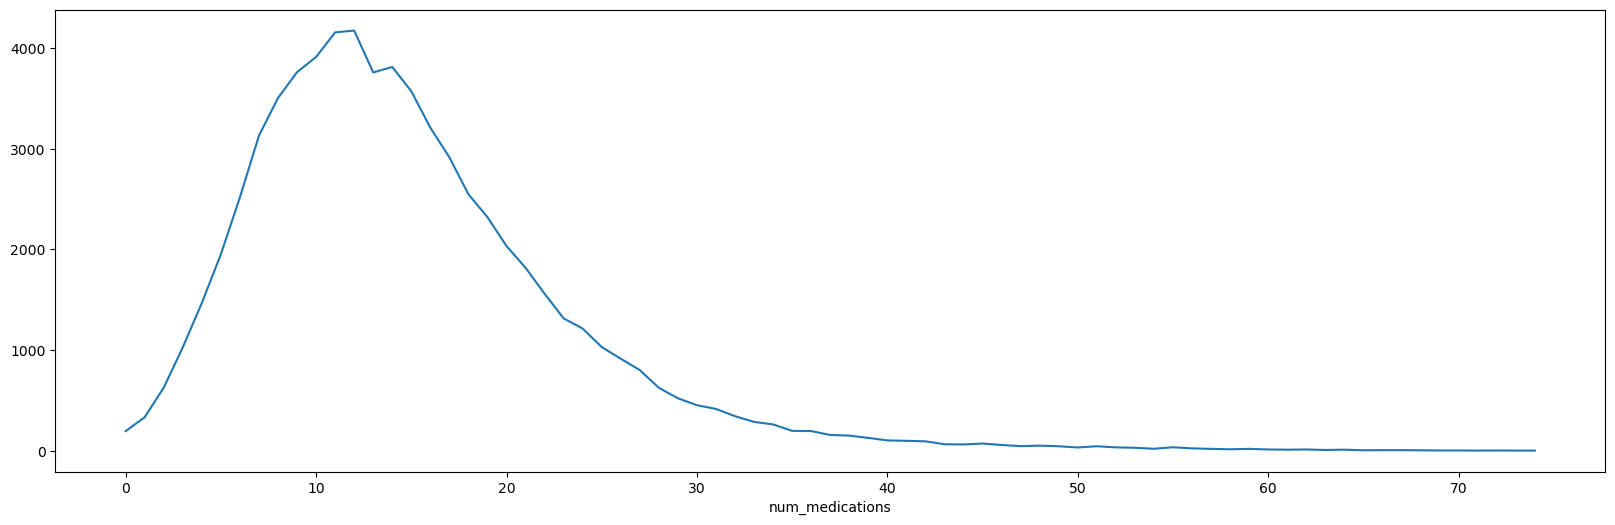

In [32]:
# Plot a line chart of the count of occurrences for each 'num_medications' value
number_medication=pd.DataFrame(df["num_medications"]).groupby("num_medications")["num_medications"].count()
number_medication.plot(kind='line',figsize= (20,6))
plt.show()

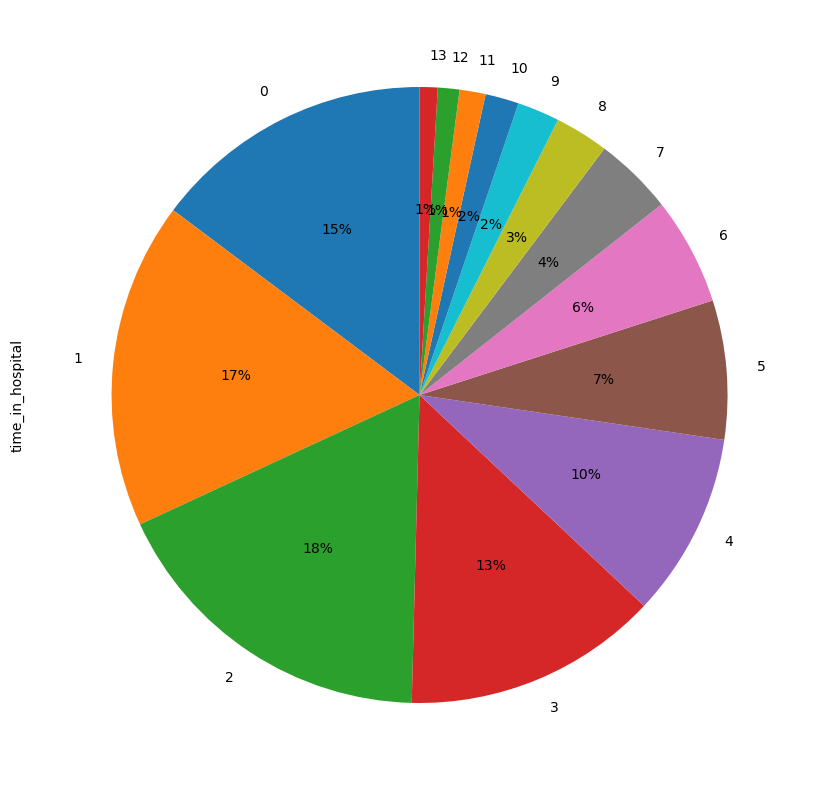

In [33]:
# Plot a pie chart of the count of occurrences for each 'time_in_hospital' value
time_in_hospital=pd.DataFrame(df["time_in_hospital"]).groupby("time_in_hospital")["time_in_hospital"].count()
time_in_hospital.plot(kind='pie', subplots=True, shadow = False,autopct='%1.0f%%',startangle=90,figsize=(15,10))
plt.show()

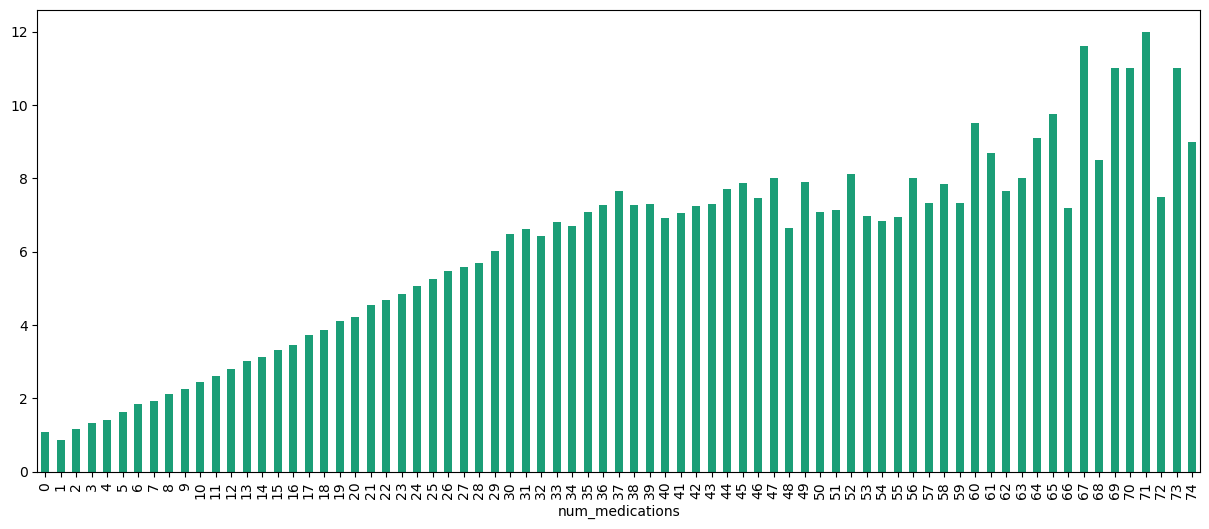

In [34]:
# Plot a bar chart showing the average 'time_in_hospital' for each 'num_medications' value
medication_vs_time=pd.DataFrame(df["num_medications"])
medication_vs_time.insert(1,"time_in_hospital",df["time_in_hospital"])
medication_vs_time=medication_vs_time.groupby("num_medications").mean()
medication_vs_time["time_in_hospital"].plot(kind='bar',cmap='Dark2',figsize= (15,6))
plt.show()

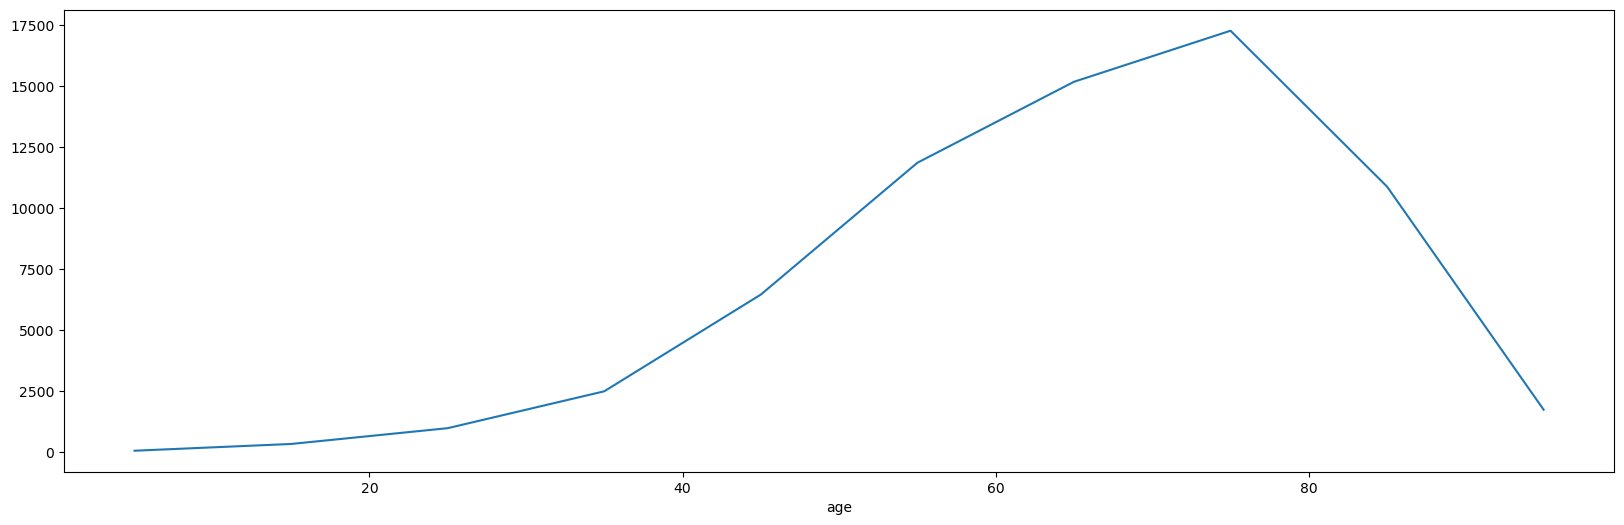

In [35]:
# Plot a line chart showing the count of occurrences for each 'age' value in the 'data' DataFrame
data.groupby("age")["age"].count().plot(kind='line',figsize= (20,6))
plt.show()